In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def plot_PhasePortrait(f, x0, x1, axes ,lim=None, scale=50):
    X0, X1 = np.meshgrid(x0, x1)
    X_dot0, X_dot1 = np.zeros(X0.shape), np.zeros(X1.shape)
    NI, NJ = X0.shape
    
    for i in range(NI):
        for j in range(NJ):
            X_dot = f([X0[i, j], X1[i, j]])
            X_dot0[i, j] = X_dot[0]
            X_dot1[i, j] = X_dot[1]

    Q = axes.quiver(X0, X1, X_dot0, X_dot1, color='r', scale=scale)
    axes.set_xlabel('$x$')
    axes.set_ylabel('$\dot{x}$')
    if lim is not None:
        axes.set_xlim(lim[0])
        axes.set_ylim(lim[1])

### Motion Policy

>A motion policy is a map $\mathbf{\pi}: \mathbf{y},\mathbf{\dot{y}} \rightarrow \mathbf{\ddot{y}}$ from position and velocity to acceleration

### Naive obs policy

$$\ddot{x} = \frac{4\alpha}{x^5}$$ 
where $x$ is the distance to the obstacle

In [3]:
def obs(alpha, b, x, x_dot):
    return 4*alpha / x**5 # - b*x_dot

alpha = 0.001
b = 1
def f1(x, t=0):
    return np.array([x[1], obs(alpha, b, x[0], x[1])])

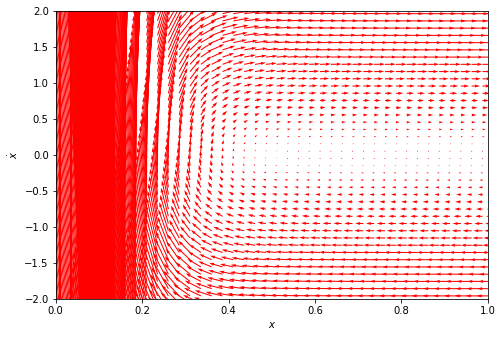

In [4]:
x = np.linspace(1e-2, 5, 200)
x_dot = np.linspace(-10, 10, 200)
fig = plt.figure() 
axes = fig.add_axes([0, 0, 1, 1])
axes_limit = [[0,1], [-2, 2]]

plot_PhasePortrait(f1, x, x_dot, axes, axes_limit, scale=50)

Start: (0.5, 0.0), end: (0.6195208253439874,0.13573106169212465)
Start: (0.5, 1.0), end: (2.021239972311038,1.015815057656674)
Start: (0.5, 10.0), end: (15.502373676242485,10.001600247038963)
Start: (0.5, -1.0), end: (1.2779642619123321,1.0155048054202007)
Start: (0.5, -10.0), end: (14.582537439492706,10.001595053016331)
Start: (0.5, -15.0), end: (22.067016216929776,15.001056754296608)


(-10, 10)

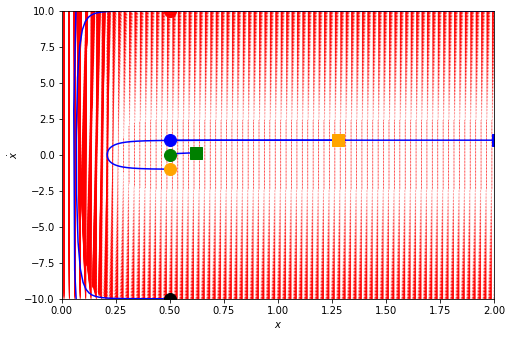

In [5]:
x = np.linspace(1e-2, 5, 200)
x_dot = np.linspace(-10, 10, 200)
fig = plt.figure() 
axes = fig.add_axes([0, 0, 1, 1])
axes_limit = [[0,1], [-2, 2]]

colors = ['green', 'blue', 'red', 'orange', 'black', 'gray']
plot_PhasePortrait(f1, x, x_dot, axes, axes_limit, scale=1000)
for i, x_dot0 in enumerate([0, 1, 10, -1, -10, -15]):
    tspan = np.linspace(0, 1.5, 1000)
    x0 = [0.5, x_dot0]
    xs = odeint(f1, x0, tspan)
    axes.plot(xs[:,0], xs[:,1], 'b-') # path
    axes.plot([xs[0,0]], [xs[0,1]], 'o', markersize=12, color=colors[i]) # start
    axes.plot([xs[-1,0]], [xs[-1,1]], 's', markersize=12, color=colors[i]) # end
    print("Start: ({0}, {1}), end: ({2},{3})".format(xs[0, 0], 
                                                     xs[0, 1],
                                                     xs[-1, 0],
                                                     xs[-1, 1]))
    
axes.set_xlim([0, 2])
axes.set_ylim([-10, 10])

---
Now consider Riemannian Motion Policy 

Designed Geometry Dynamic System:
$$
(G(x, \dot{x}) + \Xi_G)\ddot{x} + \xi_G = -B\dot{x} - \nabla_x\phi(x)
$$
on the 1-d manifold with a coordinate $x = d(q)$, where 
$d$ is a distance function


1. design $G(x, \dot{x})$

here we choose 
$$
    G(x, \dot{x})=w(x)u(\dot{x}) > 0 \\
    w(x) = \frac{1}{x^4} \\
    u(\dot{x}) = min(0, \dot{x})\dot{x} + \epsilon 
$$

then GDS:
$$
(\frac{\epsilon}{x^4})\ddot{x} = 4\alpha\frac{1}{x^9}; \, \textit{for} \, \dot{x} > 0 \\
(\frac{\dot{x}^2 + \epsilon}{x^4} + \frac{\dot{x}^2}{x^4})\ddot{x} - 2\frac{\dot{x}^4}{x^5} = 4\alpha \frac{1}{x^9}; \; \textit{for} \, \dot{x} \leq 0 \\
$$

that is
if $\dot{x} > 0$, 
$$
\ddot{x} = \frac{4\alpha}{\epsilon x^5}
$$
if $\dot{x} \leq 0$,
$$
\ddot{x} = \frac{\dot{x}^2}{x} + \frac{\epsilon x^4\dot{x}^2+4\alpha}{x^5(2\dot{x}^2) + \epsilon}
$$



In [ ]:
def RMP_obs(alpha, eps, x, x_dot):
    if(x_dot) > 0:
        x_ddot = (4*alpha) / (eps*(x**5))
    else:
        x_ddot = (x_dot**2/x) + ((eps*(x**4)*(x_dot**2) + 4*alpha) / ((2*x_dot**2 + eps)* x**5))
    return x_ddot


alpha = 0.001
eps = 0.2
b = 1

def RMP_obs2(alpha, b, eps, x, x_dot):
    if(x_dot > 0):
        x_ddot = (4*alpha / (eps*(x**5))) - (b*x**4*x_dot)/eps
    else:
        x_ddot = (2*(x**4*x_dot**4 + 2*alpha) / ((2*x_dot + eps)* x**5)) - (b*x**4*x_dot) / (2*x_dot+eps)
    return x_ddot
                  
def f2(x, t=0):
    return [x[1], RMP_obs(alpha, eps, x[0], x[1])]


In [ ]:
x = np.linspace(1e-2, 5, 200)
x_dot = np.linspace(-10, 10, 200)
fig = plt.figure() 
axes = fig.add_axes([0, 0, 1, 1])
axes_limit = [[0, 0.8], [-2, 2]]

plot_PhasePortrait(f2, x, x_dot, axes, axes_limit, scale=100)

In [ ]:
f2([0.5, -30])

In [ ]:
from scipy.integrate import odeint
x = np.linspace(1e-2, 5, 200)
x_dot = np.linspace(-10, 10, 200)
fig = plt.figure() 
axes = fig.add_axes([0, 0, 1, 1])
axes_limit = [[0,1], [-2, 2]]



plot_PhasePortrait(f2, x, x_dot, axes, scale=1000)
colors = ['green', 'blue', 'red', 'orange', 'black', 'gray']
for i, x_dot0 in enumerate([0, -1, -10, -15]):
    tspan = np.linspace(0, 2, 2000)
    x0 = [0.7, x_dot0]
    xs = odeint(f2, x0, tspan)
    axes.plot(xs[:,0], xs[:,1], 'b-') # path
    axes.plot([xs[0,0]], [xs[0,1]], 'o', markersize=12, color=colors[i]) # start
    axes.plot([xs[-1,0]], [xs[-1,1]], 's', markersize=12, color=colors[i]) # end
    print("Start: ({0}, {1}), end: ({2},{3})".format(xs[0, 0], 
                                                     xs[0, 1],
                                                     xs[-1, 0],
                                                     xs[-1, 1]))
    
axes.set_xlim([0, 2])
axes.set_ylim([-10, 10])
#plt.savefig('images/phase-portrait-2.png')

Now we plot another figure to show the actual motion by applying this policy in a 
2D obstacle avoidance case

# Joint Limit avoidance

1-d phase portrait

In [ ]:
ll = -10
lu = 10
sigma = 0.001

def Jave(x, x_dot):
    s = (x - ll) / (lu - ll)
    d = 4*s*(1-s)

    # alpha is the gate indicates if the joint moving towards the limits
    x_dot_p = max(x_dot, 0)
    x_dot_n = min(x_dot, 0)

    alpha_u = 1 - np.exp(-x_dot_p**2/(2*sigma**2))
    alpha_l = 1 - np.exp(-x_dot_n**2/(2*sigma**2))
    b = s*(alpha_u*d + (1-alpha_u)*1) + (1 - s)*(alpha_l*d + (1-alpha_l)*1)
    # 1-d matric 
    a = 1 / b**2

    # Xi
    grad_alpha = x_dot*np.exp(-x_dot**2/(2*sigma**2)) / sigma**2
    grad_alphaU = max(grad_alpha, 0)
    grad_alphaL = min(grad_alpha, 0)
    grad_b  = -s*(1-d)*grad_alphaU - (1-s)*(1-d)*grad_alphaL
    Xi = -x_dot * b**(-3) * grad_b

    # xi
    grad_x_b = (alpha_u - alpha_l)*(- 12*s**2 + 8*s - 1) + alpha_l*(1 - 2*s)
    xi = -b**(-3)*x_dot**2*grad_x_b

    # grad_phi
    grad_phi = 0

    # Bx_dot
    Bx_dot = 0
    #A = np.diag(a)
    #Xi = np.diag(Xi)

    M = a + Xi
    f = -Bx_dot - xi - grad_phi
    return M**(-1) * f

def Jave_f(x, t=0):
    return np.array([x[1], Jave(x[0], x[1])])

In [ ]:
x = np.linspace(-10, 10, 50)
x_dot = np.linspace(-5, 5, 50)
fig = plt.figure() 
axes = fig.add_axes([0, 0, 1, 1])
axes_limit = [[-10, 10], [-7, 7]]

plot_PhasePortrait(Jave_f, x, x_dot, axes, axes_limit, scale=100)

$\ddot{\mathbf{q}}^{*} = \text{argmin}_{\ddot{\mathbf{q}}}\frac{1}{2}\sum_{i}{\|\mathbf{J}_i\mathbf{\ddot{q}} - \ddot{\mathbf{x}}_i^d + \mathbf{\dot{J}}_i\mathbf{\dot{q}}\|_{M_i}^2}$